In [75]:
#시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글 설정
plt.rc('font',family='AppleGothic') # 맥 한글 설정
#plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
#경고 메시지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns

# 1.2000~2019년도 서울시 출산율 사망률 데이터 불러오기

In [76]:
# 데이터 불러오기(이연주)
ingu=pd.read_excel("/Users/yeonju1/Documents/bigData/src/07_Python/TeamProject/data/서울시 출생·사망 (월별) 통계.xls",header=None)
ingu

,0,1,2,3,4,5,6,7,8
0,기간,자치구별,월별,출생사망(월별),출생사망(월별),출생사망(월별),출생사망(월별),출생사망(월별),출생사망(월별)
1,기간,자치구별,월별,출생,출생,출생,사망,사망,사망
2,기간,자치구별,월별,계,남자,여자,계,남자,여자
3,2000,합계,계,133154,69406,63748,39296,21387,17909
4,2000,합계,1월,12866,6738,6128,3931,2048,1883
...,...,...,...,...,...,...,...,...,...
7096,2020,강동구,8월,232,123,109,…,…,…
7097,2020,강동구,9월,241,111,130,…,…,…
7098,2020,강동구,10월,207,108,99,…,…,…
7099,2020,강동구,11월,201,97,104,…,…,…


# 2.데이터 전처리

In [77]:
ingu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7101 non-null   object
 1   1       7101 non-null   object
 2   2       7101 non-null   object
 3   3       7101 non-null   object
 4   4       7101 non-null   object
 5   5       7101 non-null   object
 6   6       7101 non-null   object
 7   7       7101 non-null   object
 8   8       7101 non-null   object
dtypes: object(9)
memory usage: 499.4+ KB


## 2.1필요없는 행 제거

In [78]:
#필요없는 행 제거
ingu=ingu[(ingu[1]!="자치구별")&(ingu[1]!="합계")]
ingu=ingu[(ingu[2]!="계")]
ingu

,0,1,2,3,4,5,6,7,8
17,2000,종로구,1월,141,76,65,97,42,55
18,2000,종로구,2월,175,98,77,74,35,39
19,2000,종로구,3월,211,114,97,71,39,32
20,2000,종로구,4월,176,92,84,80,39,41
21,2000,종로구,5월,143,77,66,66,36,30
...,...,...,...,...,...,...,...,...,...
7096,2020,강동구,8월,232,123,109,…,…,…
7097,2020,강동구,9월,241,111,130,…,…,…
7098,2020,강동구,10월,207,108,99,…,…,…
7099,2020,강동구,11월,201,97,104,…,…,…


## 2.2 필요없는 열 제거

In [79]:
ingu.drop(labels=[3,6],axis=1,inplace=True)

In [80]:
ingu

,0,1,2,4,5,7,8
17,2000,종로구,1월,76,65,42,55
18,2000,종로구,2월,98,77,35,39
19,2000,종로구,3월,114,97,39,32
20,2000,종로구,4월,92,84,39,41
21,2000,종로구,5월,77,66,36,30
...,...,...,...,...,...,...,...
7096,2020,강동구,8월,123,109,…,…
7097,2020,강동구,9월,111,130,…,…
7098,2020,강동구,10월,108,99,…,…
7099,2020,강동구,11월,97,104,…,…


## 2.3 컬럼 이름 설정 및 인덱스 정리

In [81]:
ingu.columns=["년도","지역구","월","남자 출생수","여자 출생수","남자 사망수","여자 사망수"]
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
17,2000,종로구,1월,76,65,42,55
18,2000,종로구,2월,98,77,35,39
19,2000,종로구,3월,114,97,39,32
20,2000,종로구,4월,92,84,39,41
21,2000,종로구,5월,77,66,36,30
...,...,...,...,...,...,...,...
7096,2020,강동구,8월,123,109,…,…
7097,2020,강동구,9월,111,130,…,…
7098,2020,강동구,10월,108,99,…,…
7099,2020,강동구,11월,97,104,…,…


In [82]:
ingu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 17 to 7100
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      6300 non-null   object
 1   지역구     6300 non-null   object
 2   월       6300 non-null   object
 3   남자 출생수  6300 non-null   object
 4   여자 출생수  6300 non-null   object
 5   남자 사망수  6300 non-null   object
 6   여자 사망수  6300 non-null   object
dtypes: object(7)
memory usage: 393.8+ KB


In [83]:
#인덱스 재정리 
ingu.shape
ingu.shape[0]
ingu.index=range(ingu.shape[0])
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,종로구,1월,76,65,42,55
1,2000,종로구,2월,98,77,35,39
2,2000,종로구,3월,114,97,39,32
3,2000,종로구,4월,92,84,39,41
4,2000,종로구,5월,77,66,36,30
...,...,...,...,...,...,...,...
6295,2020,강동구,8월,123,109,…,…
6296,2020,강동구,9월,111,130,…,…
6297,2020,강동구,10월,108,99,…,…
6298,2020,강동구,11월,97,104,…,…


## 2.4 데이터 형변환 및 함수 활용 변수 변경

In [84]:
def function(data):
    data["월"]=data["월"].replace("월","")
    return data

In [85]:
ingu=ingu.apply(function,axis=1)
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,종로구,1,76,65,42,55
1,2000,종로구,2,98,77,35,39
2,2000,종로구,3,114,97,39,32
3,2000,종로구,4,92,84,39,41
4,2000,종로구,5,77,66,36,30
...,...,...,...,...,...,...,...
6295,2020,강동구,8,123,109,…,…
6296,2020,강동구,9,111,130,…,…
6297,2020,강동구,10,108,99,…,…
6298,2020,강동구,11,97,104,…,…


In [86]:
# 2020년도 데이터에 결측치가 있어서 일단 삭제하고 진행했습니다
idx = ingu[ingu['년도'] == '2020'].index
ingu = ingu.drop(idx)
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,종로구,1,76,65,42,55
1,2000,종로구,2,98,77,35,39
2,2000,종로구,3,114,97,39,32
3,2000,종로구,4,92,84,39,41
4,2000,종로구,5,77,66,36,30
...,...,...,...,...,...,...,...
5995,2019,강동구,8,119,109,88,71
5996,2019,강동구,9,90,95,92,76
5997,2019,강동구,10,104,115,83,70
5998,2019,강동구,11,83,115,101,70


In [87]:
#데이터형 변환
ingu["년도"]=ingu["년도"].astype("int")
ingu["월"]=ingu["월"].astype("int")
ingu["남자 출생수"]=ingu["남자 출생수"].astype("int")
ingu["여자 출생수"]=ingu["여자 출생수"].astype("int")
ingu["남자 사망수"]=ingu["남자 사망수"].astype("int")
ingu["여자 사망수"]=ingu["여자 사망수"].astype("int")

In [88]:
ingu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      6000 non-null   int64 
 1   지역구     6000 non-null   object
 2   월       6000 non-null   int64 
 3   남자 출생수  6000 non-null   int64 
 4   여자 출생수  6000 non-null   int64 
 5   남자 사망수  6000 non-null   int64 
 6   여자 사망수  6000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 375.0+ KB


In [89]:
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,종로구,1,76,65,42,55
1,2000,종로구,2,98,77,35,39
2,2000,종로구,3,114,97,39,32
3,2000,종로구,4,92,84,39,41
4,2000,종로구,5,77,66,36,30
...,...,...,...,...,...,...,...
5995,2019,강동구,8,119,109,88,71
5996,2019,강동구,9,90,95,92,76
5997,2019,강동구,10,104,115,83,70
5998,2019,강동구,11,83,115,101,70


## 2.5 groupby 활용 데이터 전처리

In [90]:
ingu_y=ingu.groupby(["년도"]).sum()
ingu_y

,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
년도,,,,,
2000,1950,69406,63748,21387,17909
2001,1950,59476,55288,21121,17334
2002,1950,53105,48903,21254,17671
2003,1950,52191,49036,20913,17155
2004,1950,51453,48375,21226,17048
2005,1950,46679,43789,21461,17290
2006,1950,48520,45402,21311,17208
2007,1950,52139,49110,21748,17268
2008,1950,48826,45910,21455,16843


In [91]:
ingu_b=ingu_y.drop("월",axis=1)
ingu_b

,남자 출생수,여자 출생수,남자 사망수,여자 사망수
년도,,,,
2000,69406,63748,21387,17909
2001,59476,55288,21121,17334
2002,53105,48903,21254,17671
2003,52191,49036,20913,17155
2004,51453,48375,21226,17048
2005,46679,43789,21461,17290
2006,48520,45402,21311,17208
2007,52139,49110,21748,17268
2008,48826,45910,21455,16843


In [92]:
ingu_g=ingu.groupby(['지역구']).sum()
ingu_g=ingu_g.drop(["년도","월"],axis=1)
ingu_g=ingu_g.reset_index()
ingu_g

,지역구,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,강남구,45389,42644,17236,16737
1,강동구,42282,39501,19219,15605
2,강북구,27372,25711,19582,14141
3,강서구,57058,53841,24940,20835
4,관악구,48752,45891,22457,16954
5,광진구,35391,32972,14682,11426
6,구로구,45281,42685,18203,13723
7,금천구,21573,20459,12197,8934
8,노원구,56150,53076,27963,23775
9,도봉구,30702,28486,17373,13819


In [93]:
ingu_z=ingu.groupby(["년도","지역구"]).sum()
ingu_z

월  남자 출생수  여자 출생수  남자 사망수  여자 사망수
년도   지역구                                    
2000 강남구  78    3299    2955     870     852
     강동구  78    3140    2867     935     794
     강북구  78    2003    1802     876     664
     강서구  78    3751    3389    1044     832
     관악구  78    3900    3467    1066     807
...       ..     ...     ...     ...     ...
2019 용산구  78     684     630     620     487
     은평구  78    1253    1154    1296    1019
     종로구  78     334     339     482     372
     중구   78     426     357     408     257
     중랑구  78    1176    1068    1236     813

[500 rows x 5 columns]

In [94]:
ingu_z=ingu_z.reset_index()

In [95]:
ingu_z

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,강남구,78,3299,2955,870,852
1,2000,강동구,78,3140,2867,935,794
2,2000,강북구,78,2003,1802,876,664
3,2000,강서구,78,3751,3389,1044,832
4,2000,관악구,78,3900,3467,1066,807
...,...,...,...,...,...,...,...
495,2019,용산구,78,684,630,620,487
496,2019,은평구,78,1253,1154,1296,1019
497,2019,종로구,78,334,339,482,372
498,2019,중구,78,426,357,408,257


## 2.6 rest_index() 활용

In [96]:
ingu_b=ingu_b.reset_index()
ingu_b

,년도,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,69406,63748,21387,17909
1,2001,59476,55288,21121,17334
2,2002,53105,48903,21254,17671
3,2003,52191,49036,20913,17155
4,2004,51453,48375,21226,17048
5,2005,46679,43789,21461,17290
6,2006,48520,45402,21311,17208
7,2007,52139,49110,21748,17268
8,2008,48826,45910,21455,16843
9,2009,45963,43631,21955,16835


# 3.데이터 시각화

## 3-1.파이플롯

### 1) 연도별 남,여 출생사망수(2000~2019년)

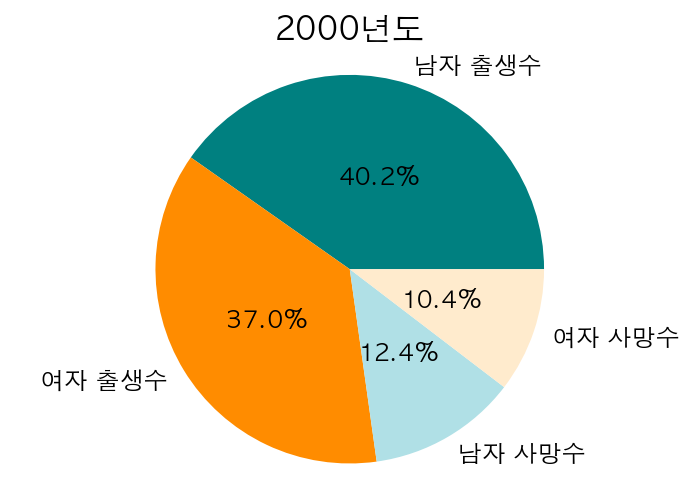

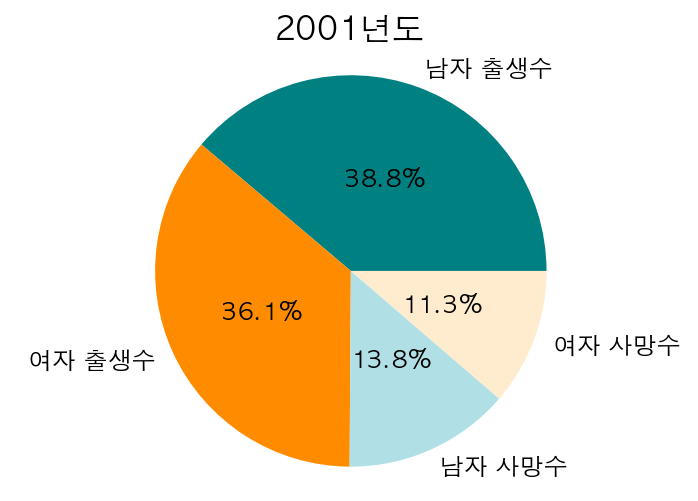

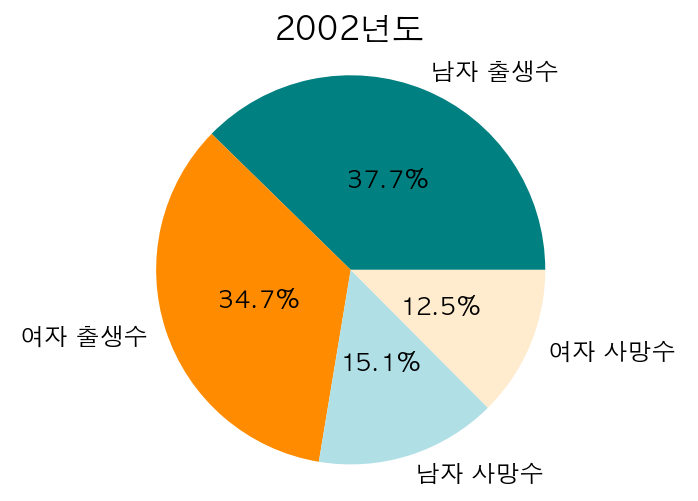

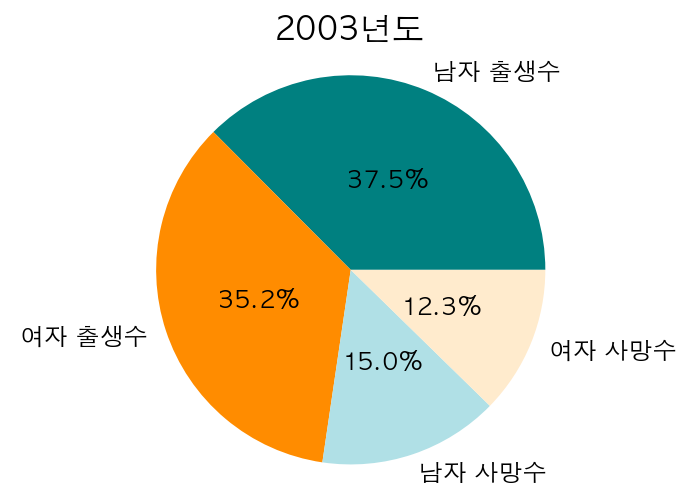

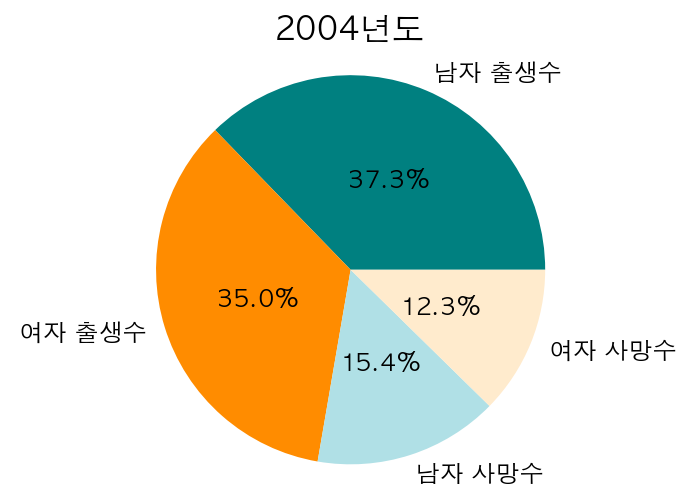

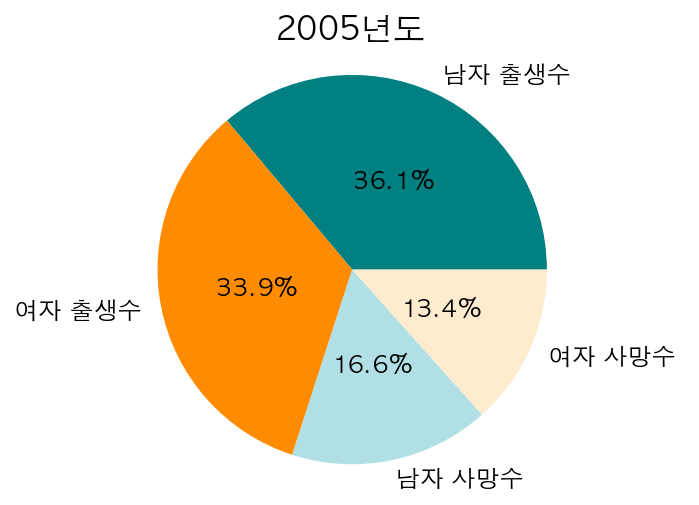

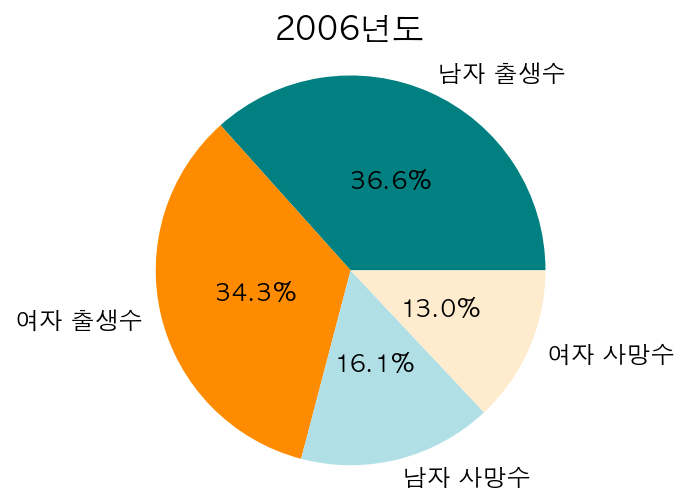

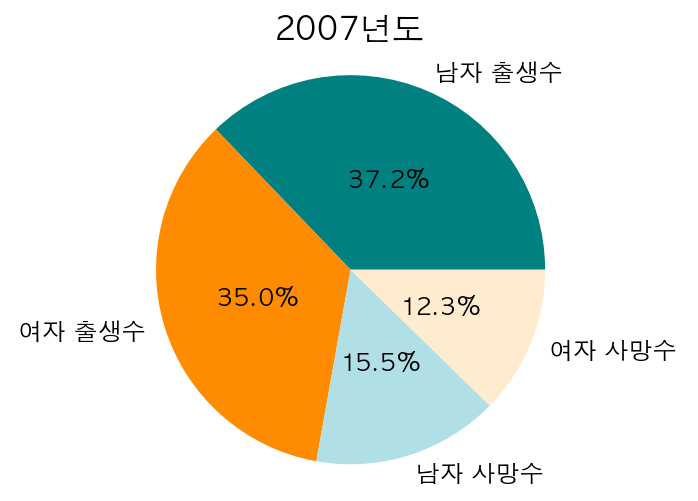

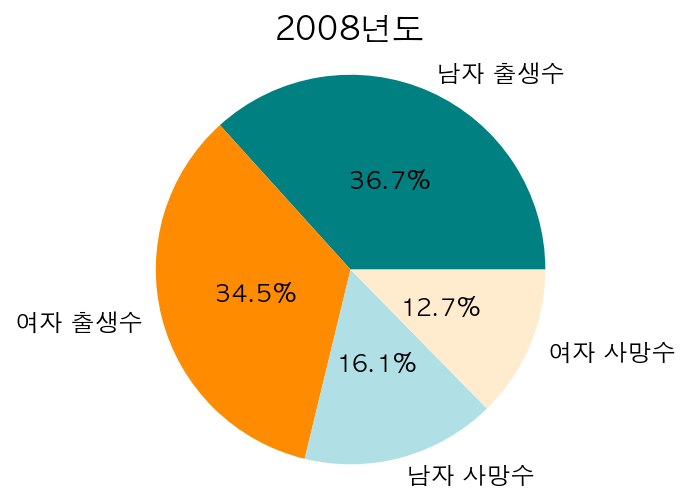

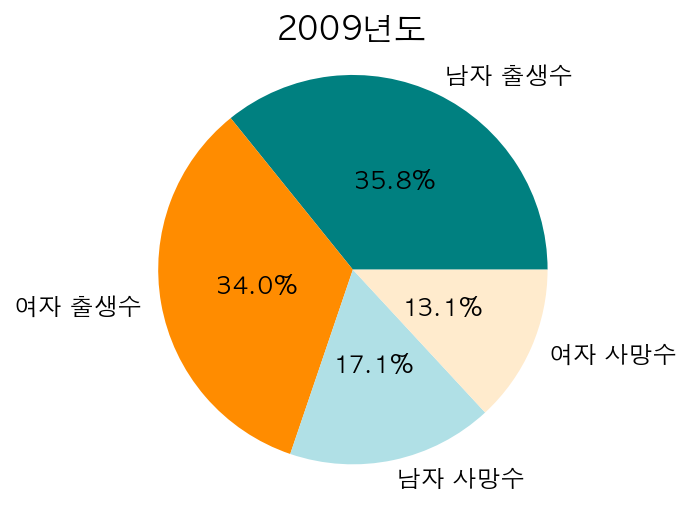

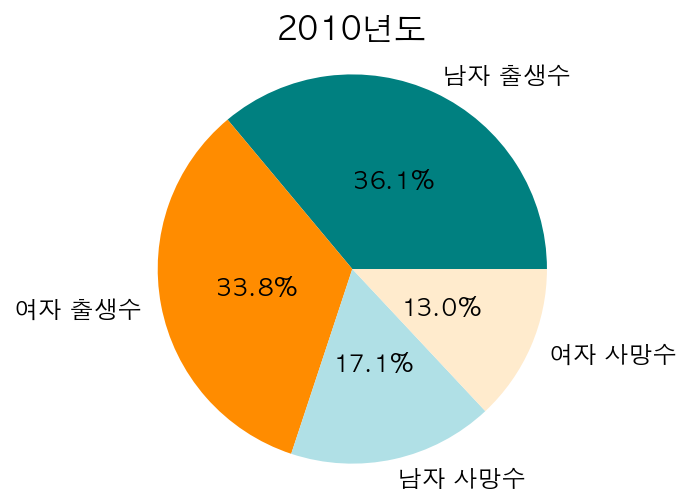

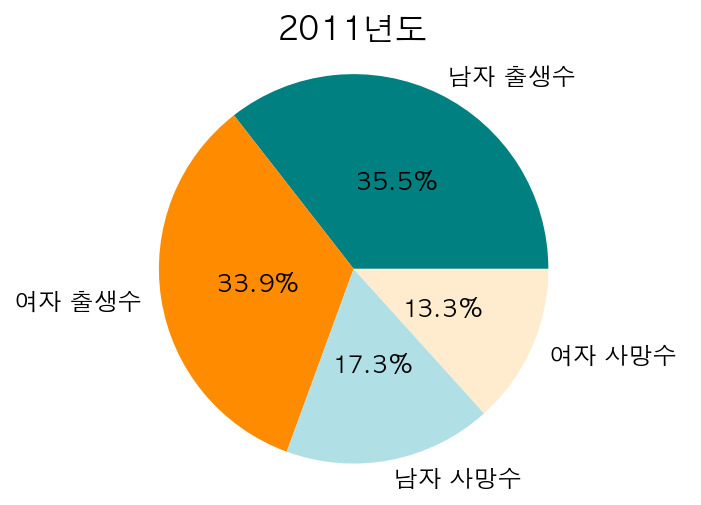

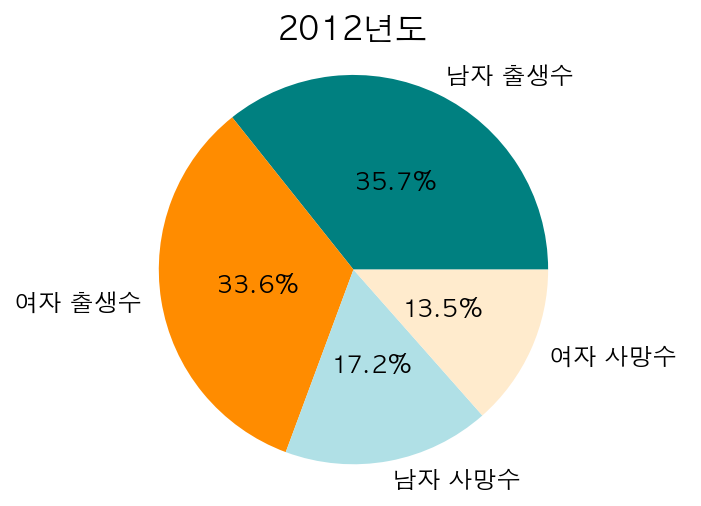

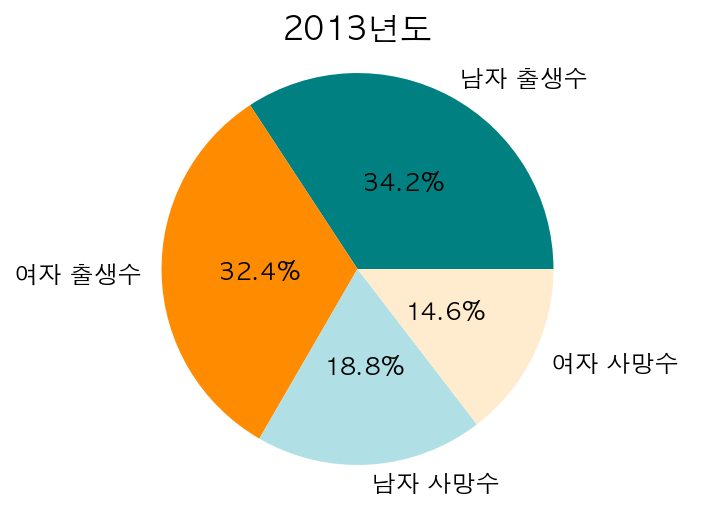

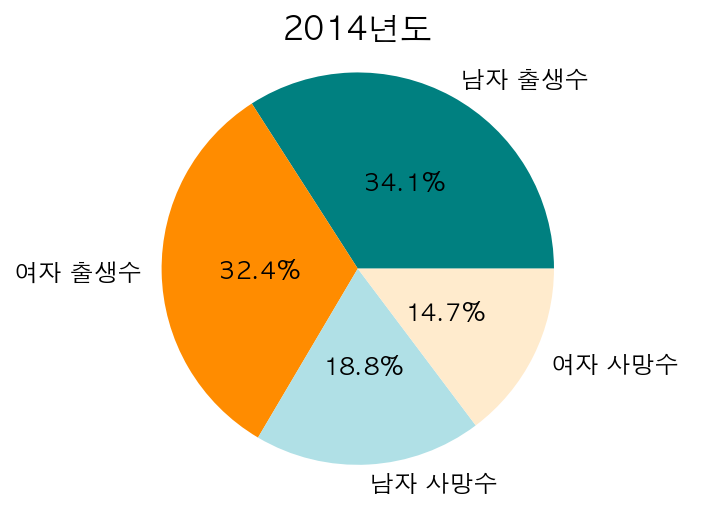

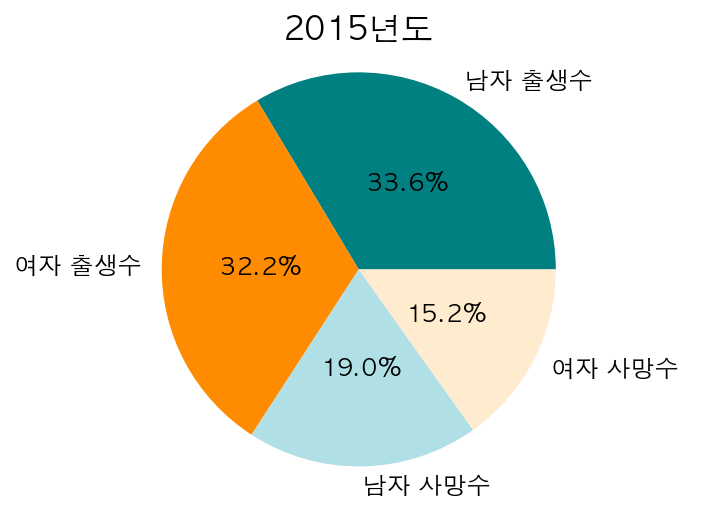

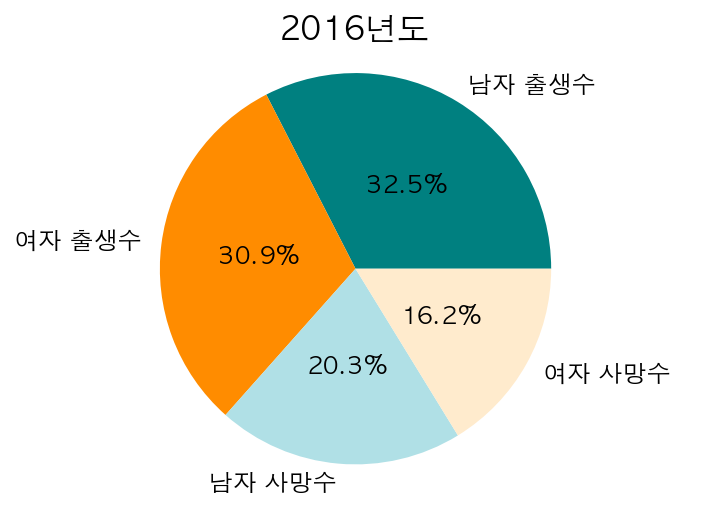

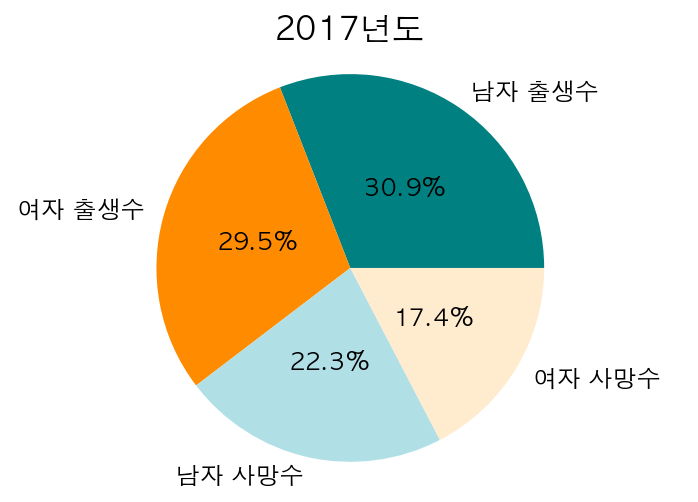

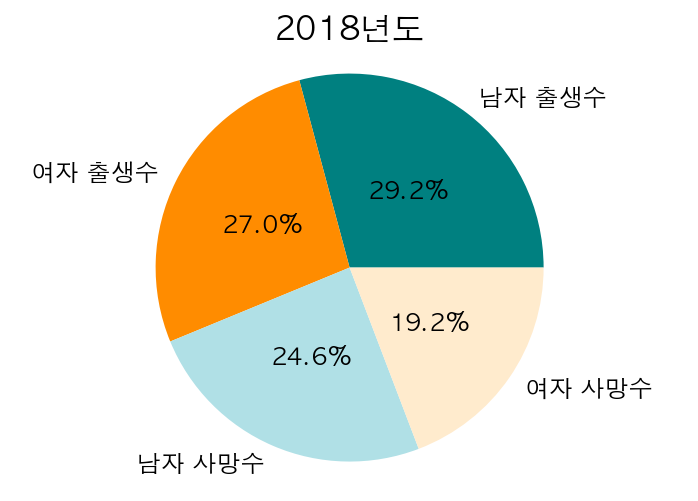

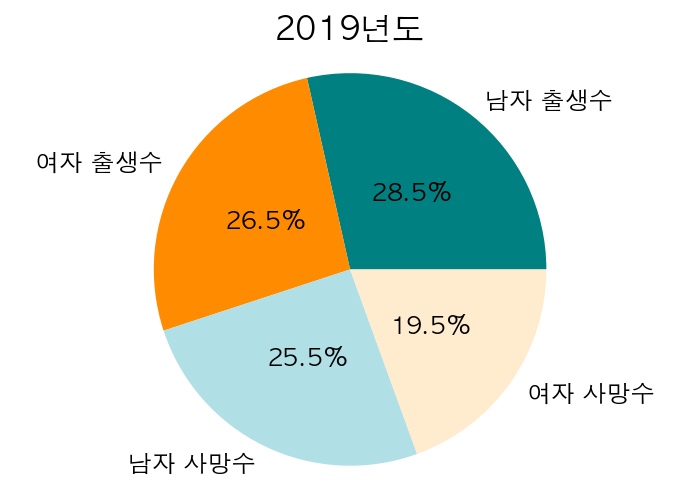

In [47]:
for i in range(len(ingu_y)):
    title = ingu_y.iloc[i,1:5].name
    label = list(ingu_y.iloc[i,1:5].index)
    size = [int(x) for x in list(ingu_y.iloc[i,1:5])]
    color = ['teal', 'darkorange', 'powderblue', 'blanchedalmond']
    plt.pie(size, labels=label, colors=color, autopct='%1.1f%%',textprops = {'fontsize':12}, pctdistance=0.5)
    plt.title(str(title)+"년도", size=16)
    plt.axis('equal')
    plt.show()

## 3-2.지도시각화

In [69]:
import folium
from folium import plugins

In [70]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [71]:
# 서울시 지도 불러오기
m = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)
m

### 1) 지역구별 남자 출생수(2000~2019년)

In [72]:
# 지역구별 남자 출생수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='남자 출생수',
    data=ingu_g,
    columns=['지역구', '남자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 출생수(명)',
)
m.add_child(choropleth)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

### 2) 지역구별 남자 출생수(2000~2019년) +팝업툴팁

In [28]:
# 지역구별 남자 출생수(2000~2019년)
# 지도시각화 팝업,툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# Popup and Tooltips
popup = GeoJsonPopup(
    fields=['name','code'],
    aliases=['지역구','지역코드'], 
    localize=True,
    labels=True,
#    style="background-color: white;",
)
tooltip = GeoJsonTooltip(
    fields=['name','code'],
    aliases=['지역구','지역코드'], 
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 1px solid black;
        border-radius: 2px;
        box-shadow: 3px;
    """,
    max_width=800,
)
# choropleth 레이어
g = folium.Choropleth(
    geo_data=state_geo,
    name='남자 출생수',
    data=ingu,
    columns=['지역구', '남자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 출생수(명)',
).add_to(m)
folium.GeoJson(
    state_geo,
    style_function=lambda feature: {
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 0.2,
        'dashArray': '5, 5'
    },
    tooltip=tooltip,
    popup=popup).add_to(g)
m

### 3) 지역구별 남,여 출생수와 사망수(2000~2019년) + 툴팁

In [67]:
# 지역구별 남자 출생수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='남자 출생수',
    data=ingu_g,
    columns=['지역구', '남자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 출생수(명)',
)
choropleth1 = folium.Choropleth(
    geo_data=state_geo,
    name='여자 출생수',
    data=ingu_g,
    columns=['지역구', '여자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '여자 출생수(명)',
)
choropleth2 = folium.Choropleth(
    geo_data=state_geo,
    name='남자 사망수',
    data=ingu_g,
    columns=['지역구', '남자 사망수'],
    key_on='feature.properties.name',
    fill_color='Purples',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 사망수(명)',
)
choropleth3 = folium.Choropleth(
    geo_data=state_geo,
    name='여자 사망수',
    data=ingu_g,
    columns=['지역구', '여자 사망수'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '여자 사망수(명)',
)

m.add_child(choropleth)
m.add_child(choropleth1)
m.add_child(choropleth2)
m.add_child(choropleth3)

folium.LayerControl().add_to(m)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth1.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth2.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth3.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

### 4) 지역구별 남,여 출생수(2000~2019년) + 툴팁

In [73]:
# 지역구별 남,여 출생수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth1 = folium.Choropleth(
    geo_data=state_geo,
    name='여자 출생수',
    data=ingu_g,
    columns=['지역구', '여자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '여자 출생수(명)',
)
choropleth2 = folium.Choropleth(
    geo_data=state_geo,
    name='남자 출생수',
    data=ingu_g,
    columns=['지역구', '남자 출생수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 출생수(명)',
)

m.add_child(choropleth1)
m.add_child(choropleth2)

folium.LayerControl().add_to(m)

style_function = "font-size: 15px; font-weight: bold"
choropleth1.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth2.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

### 5) 지역구별 남,여 사망수(2000~2019년) + 툴팁

In [74]:
# 지역구별 남,여 사망수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth1 = folium.Choropleth(
    geo_data=state_geo,
    name='여자 사망수',
    data=ingu_g,
    columns=['지역구', '여자 사망수'],
    key_on='feature.properties.name',
    fill_color='YlOrBr',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '여자 사망수(명)',
)
choropleth2 = folium.Choropleth(
    geo_data=state_geo,
    name='남자 사망수',
    data=ingu_g,
    columns=['지역구', '남자 사망수'],
    key_on='feature.properties.name',
    fill_color='Purples',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '남자 사망수(명)',
)

m.add_child(choropleth1)
m.add_child(choropleth2)

folium.LayerControl().add_to(m)

style_function = "font-size: 15px; font-weight: bold"
choropleth1.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth2.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

### 6) 지역구별 남,여 합계 출산수(2000~2019년) + 툴팁

In [103]:
ingu_s = ingu[['지역구']]
ingu_s['출생수'] = (ingu['남자 출생수'] + ingu['여자 출생수'])
ingu_s['사망수'] = (ingu['남자 사망수'] + ingu['여자 사망수'])
ingu_s

,지역구,출생수,사망수
0,종로구,141,97
1,종로구,175,74
2,종로구,211,71
3,종로구,176,80
4,종로구,143,66
...,...,...,...
5995,강동구,228,159
5996,강동구,185,168
5997,강동구,219,153
5998,강동구,198,171


In [105]:
# 지역구별 총 출생,사망수(2000~2019년)
# 지도시각화 툴팁 추가

from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
m = folium.Map(location=[37.562225, 126.978555], tiles='cartodb positron', zoom_start=11) # stamen toner, stamen terrain, cartodb positron

# choropleth 레이어
choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='출생수',
    data=ingu_s,
    columns=['지역구', '출생수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '총 출생수(명)',
)
choropleth1 = folium.Choropleth(
    geo_data=state_geo,
    name='사망수',
    data=ingu_s,
    columns=['지역구', '사망수'],
    key_on='feature.properties.name',
    fill_color='Purples',
    fill_opacity=0.5,
    line_opacity=0.3,
    highlight=True,
    color = 'gray',
    legend_name = '총 사망수(명)',
)

m.add_child(choropleth)
m.add_child(choropleth1)

folium.LayerControl().add_to(m)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))
choropleth1.geojson.add_child(folium.features.GeoJsonTooltip(['name'], style=style_function, labels=False))

m

## 3-3. matplotlib 시각화

### 1) 연도별 인구 증가현황

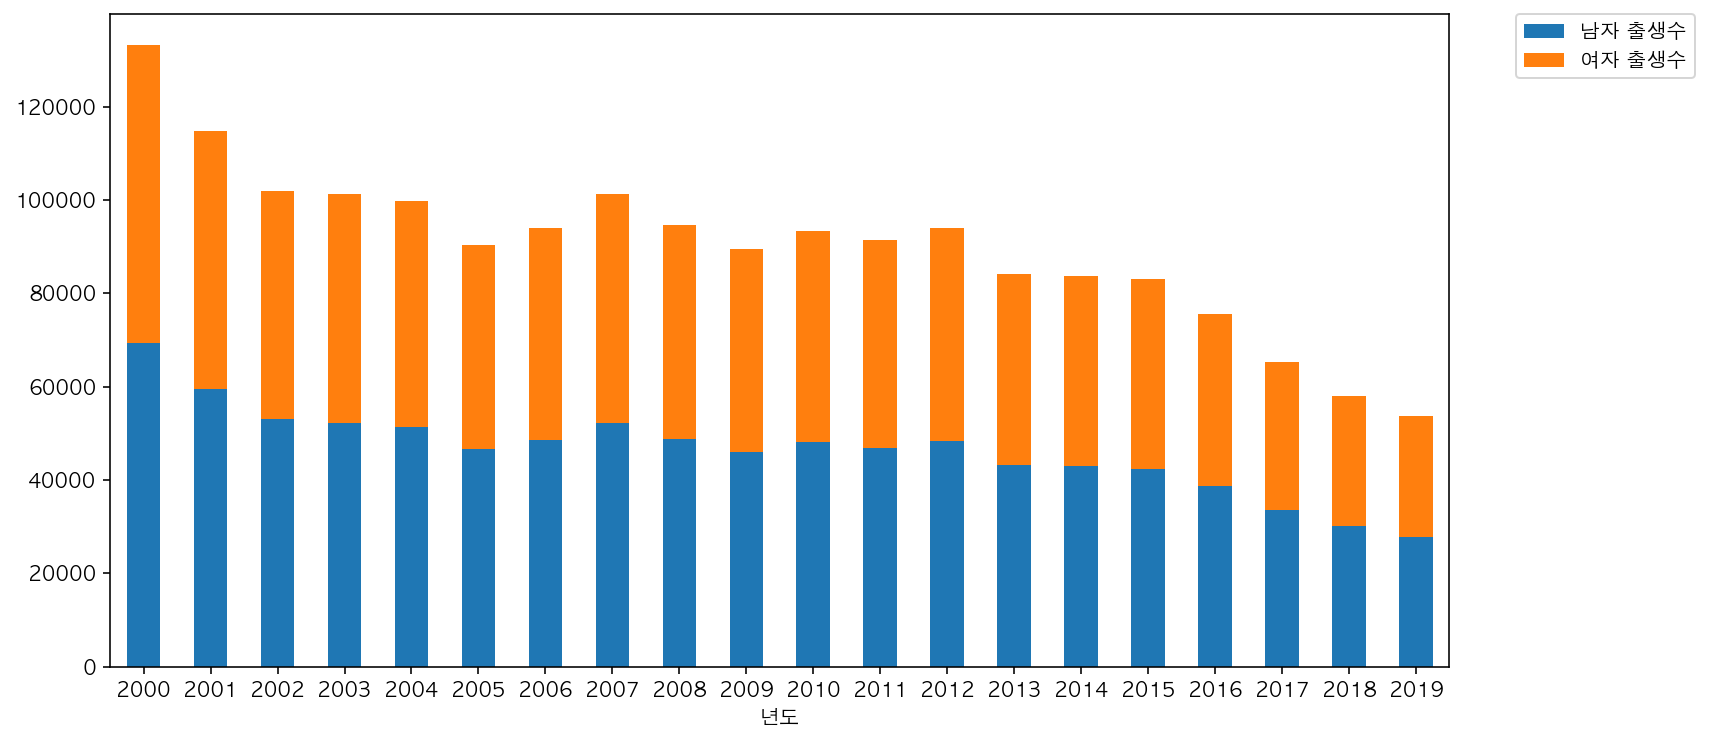

In [64]:
g = ingu_y[ingu_y.columns.difference(['월','남자 사망수','여자 사망수'])].groupby(['년도']).sum()
g.plot(kind='bar', rot=0, figsize=(12,6), stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 2) 연도별 인구 감소현황

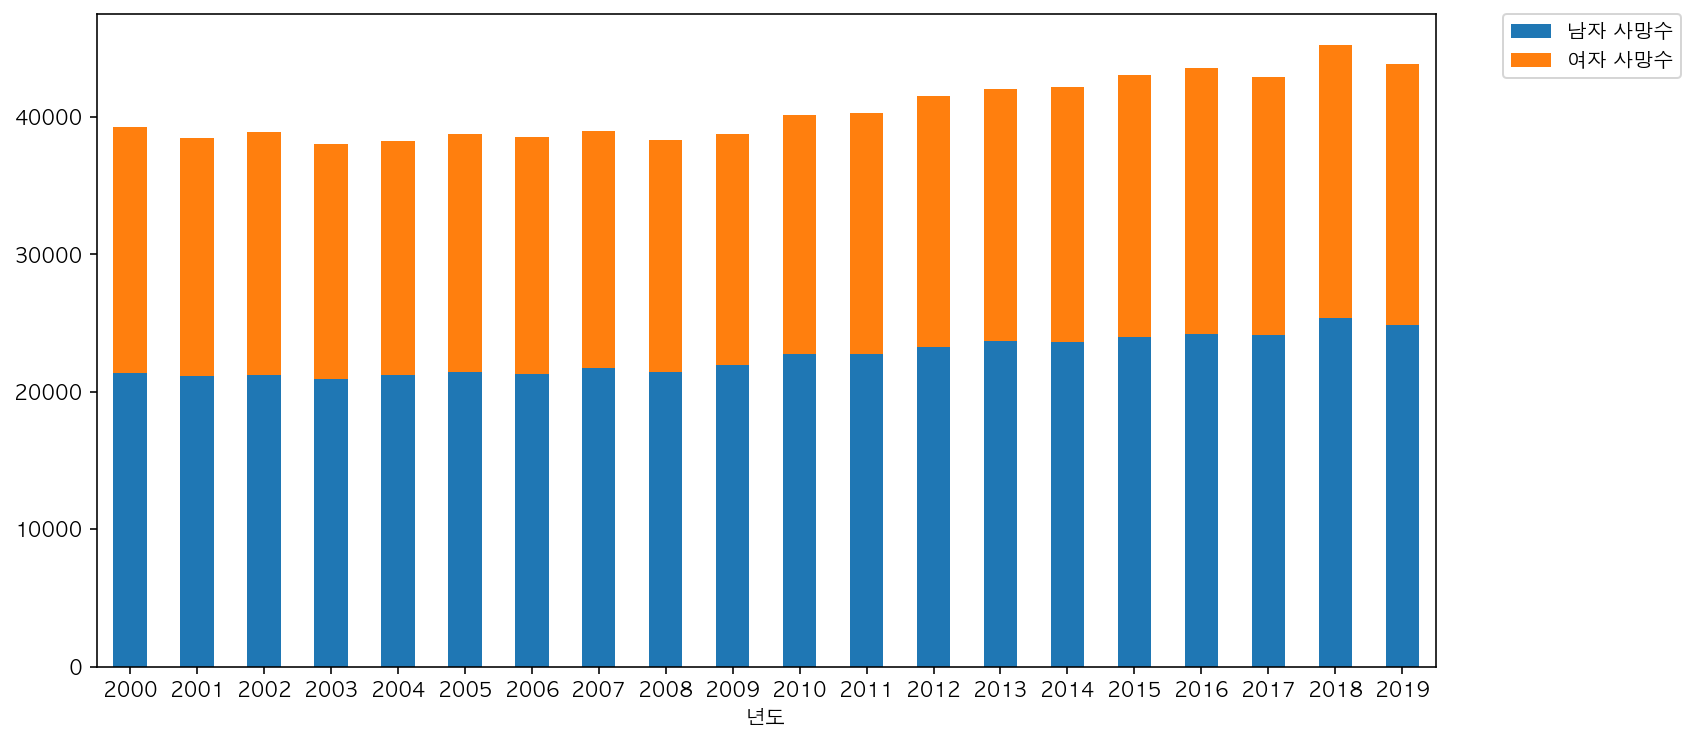

In [65]:
g = ingu_y[ingu_y.columns.difference(['월','남자 출생수','여자 출생수'])].groupby(['년도']).sum()
g.plot(kind='bar', rot=0, figsize=(12,6), stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()